* Primeiro lugar irei ler e importar os data frame para saber com que eu estou trabalhando !!!


In [ ]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point

pontos_interresse = pd.read_parquet('/content/pontos_interesse_geograficos.parquet')
unidades_faturamento = pd.read_parquet('/content/unidades_faturamento.parquet')

A baixo os dois primeiros data frame para saber o que estou trabalhando !!!


In [ ]:
pontos_interresse.head()

,latitude,longitude,tipo_negocio
0,-21.189135,-47.807438,beleza
1,-23.187898,-46.886983,comercio
2,-22.741225,-47.409536,igreja
3,-20.621171,-49.655204,oficina
4,-23.504184,-46.809928,igreja


In [ ]:
unidades_faturamento.head()

,id_unidade,2021-03-01 00:00:00,2021-04-01 00:00:00,2021-05-01 00:00:00,2021-06-01 00:00:00,2021-07-01 00:00:00,2021-08-01 00:00:00,2021-09-01 00:00:00,2021-10-01 00:00:00,2021-11-01 00:00:00,2021-12-01 00:00:00,latitude,longitude
0,0,5.068153e+06,5.032582e+06,5.398609e+06,4.471029e+06,6.055479e+06,5.681750e+06,5.450168e+06,5.690872e+06,5.920992e+06,6.936104e+06,-22.958200,-47.019540
1,1,9.175876e+04,1.005467e+05,9.437164e+04,1.055623e+05,1.044879e+05,9.704052e+04,9.734873e+04,1.249605e+05,1.030219e+05,9.041489e+04,-22.786824,-45.207747
2,2,9.014478e+06,8.241358e+06,9.894769e+06,9.829395e+06,1.024933e+07,9.738263e+06,8.993409e+06,9.298967e+06,9.827378e+06,1.105133e+07,-22.812076,-47.176020
3,3,7.092469e+06,5.935713e+06,6.619112e+06,6.074868e+06,6.548820e+06,6.266509e+06,6.564165e+06,6.333653e+06,6.029334e+06,7.246248e+06,-23.940756,-46.369782
4,4,9.656845e+04,9.653138e+04,9.078938e+04,9.514808e+04,8.344678e+04,1.095175e+05,1.028503e+05,1.009396e+05,9.604377e+04,1.222533e+05,-23.030960,-46.974822


In [ ]:
pontos_interresse['tipo_negocio'].unique()

array(['beleza', 'comercio', 'igreja', 'oficina', 'transporte',
       'restaurante', 'fornecedor', 'dentista', 'padaria', 'negocio',
       'prestador', 'correio', 'evento', 'concessionaria', 'escola',
       'supermercado', 'amenidade', 'escritório', 'outros', 'combustivel',
       'fabricante', 'clinica', 'farmacia', 'saude', 'academia',
       'praia publica', 'medico', 'petshop', 'publico', 'distribuidor',
       'hospedagem', 'esporte', 'estacionamento', 'caixa', 'hospital',
       'veterinario', 'autoescola', 'banco', 'laboratorio', 'cartorio',
       'servicopublico', 'organizacao', 'universidade', 'eventos',
       'clube', 'moradia', 'policia', 'fazenda', 'aeroporto', 'shopping',
       'bombeiro', 'cinema', 'exercito', 'heliporto'], dtype=object)

In [ ]:
negocios_valores= pontos_interresse.value_counts('tipo_negocio')
negocios_valores

,count
tipo_negocio,
comercio,154911
negocio,96076
restaurante,92247
prestador,80476
beleza,64058
escola,43761
igreja,40443
medico,35268
supermercado,29235


baixei o sp municipios no site do gov brasil

In [ ]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point
import requests
import zipfile
import io

url = "https://geoftp.ibge.gov.br/organizacao_do_territorio/malhas_territoriais/malhas_municipais/municipio_2021/UFs/SP/SP_Municipios_2021.zip"
response = requests.get(url)

zip_file = zipfile.ZipFile(io.BytesIO(response.content))

zip_file.extractall("SP_Municipios")


shapefile_path = "SP_Municipios/SP_Municipios_2021.shp"
municipios = gpd.read_file(shapefile_path)


In [ ]:
municipios = gpd.read_file('/content/SP_Municipios')

In [ ]:
municipios.head()

,CD_MUN,NM_MUN,SIGLA,AREA_KM2,geometry
0,3500105,Adamantina,SP,411.987,"POLYGON ((-51.05425 -21.40465, -51.05300 -21.4..."
1,3500204,Adolfo,SP,211.055,"POLYGON ((-49.65795 -21.20333, -49.65645 -21.2..."
2,3500303,Aguaí,SP,474.554,"POLYGON ((-46.97640 -21.96818, -46.97599 -21.9..."
3,3500402,Águas da Prata,SP,142.673,"POLYGON ((-46.73501 -21.81891, -46.73431 -21.8..."
4,3500501,Águas de Lindóia,SP,60.126,"POLYGON ((-46.60614 -22.44173, -46.60347 -22.4..."


Questao 1)

In [ ]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point

pontos_interesse = pd.read_parquet('/content/pontos_interesse_geograficos.parquet')

geometry = [Point(xy) for xy in zip(pontos_interesse.longitude, pontos_interesse.latitude)]
gdf_pontos_interesse = gpd.GeoDataFrame(pontos_interesse, geometry=geometry)
gdf_pontos_interesse = gdf_pontos_interesse.set_crs(municipios.crs)

gdf_pontos_municipios = gpd.sjoin(gdf_pontos_interesse, municipios, how="left", op='within')

pois_count = gdf_pontos_municipios.groupby('NM_MUN').size().reset_index(name='pois_count')

municipios_total = municipios.merge(pois_count, left_on='NM_MUN', right_on='NM_MUN', how='left')

municipios_total['pois_count'] = municipios_total['pois_count'].fillna(0)


/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py:3473: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):


Questao 2)

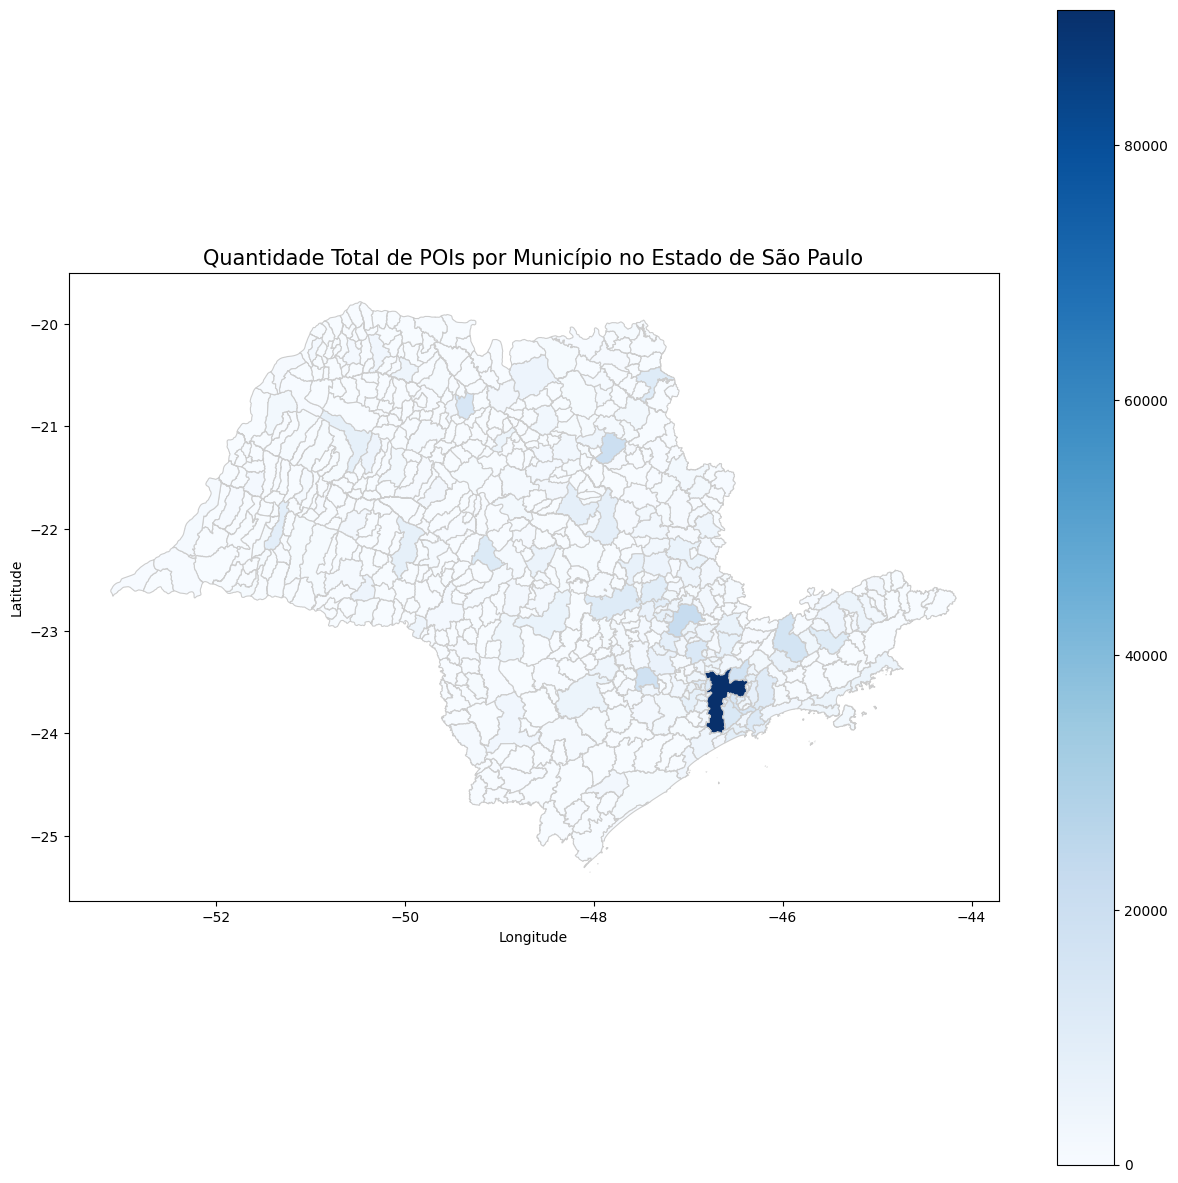

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(15, 15))
municipios_total.plot(column='pois_count', cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

ax.set_title('Quantidade Total de POIs por Município no Estado de São Paulo', fontdict={'fontsize': '15', 'fontweight' : '3'})
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

plt.show()

Questao 3)

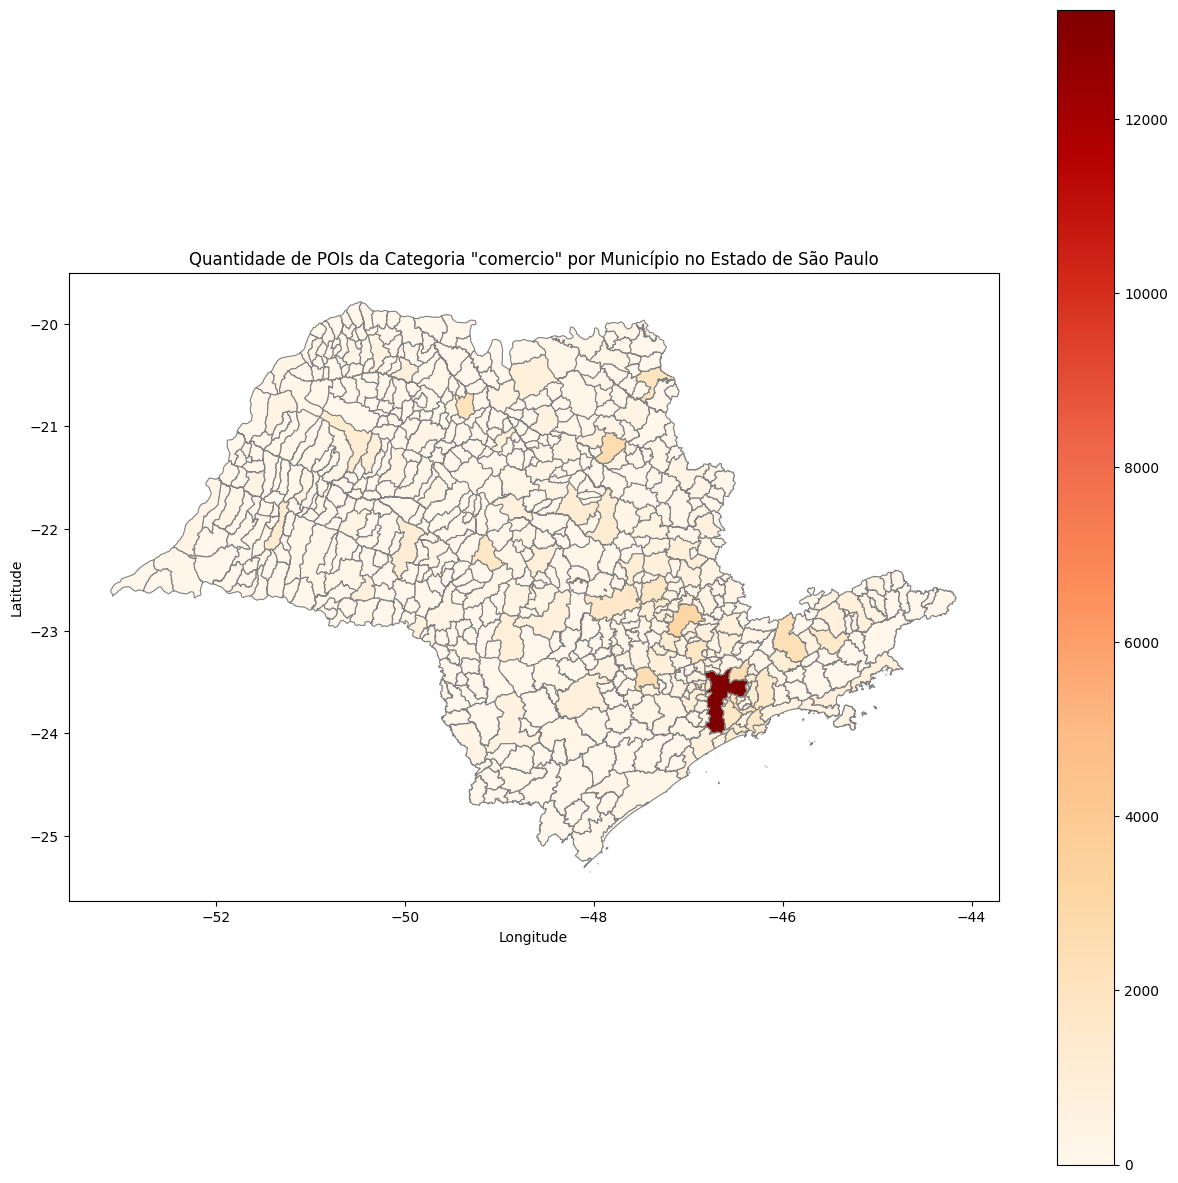

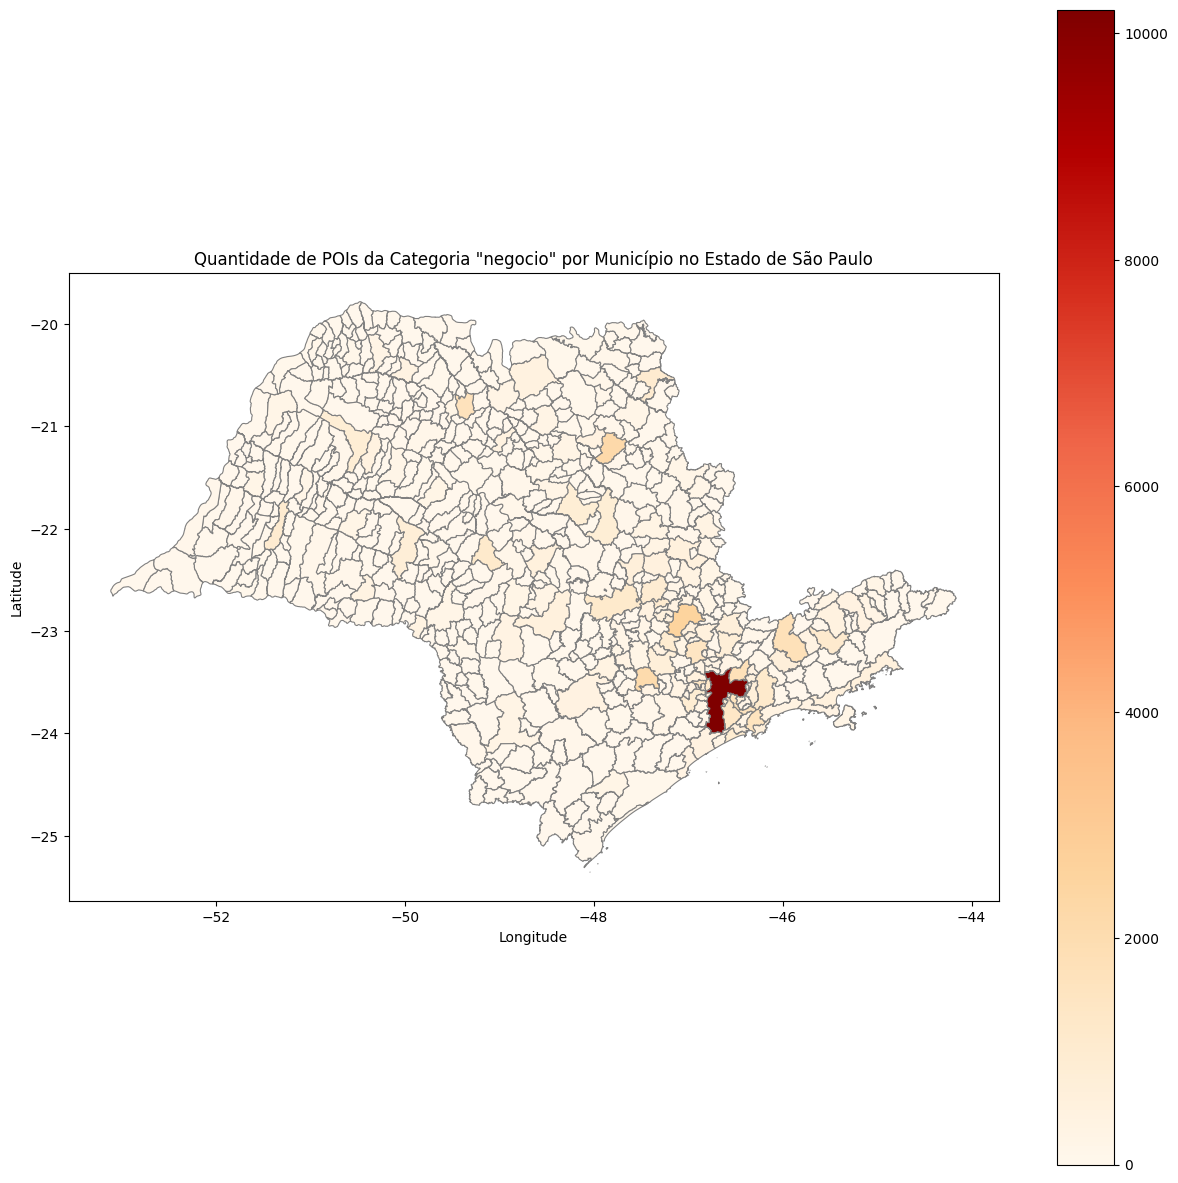

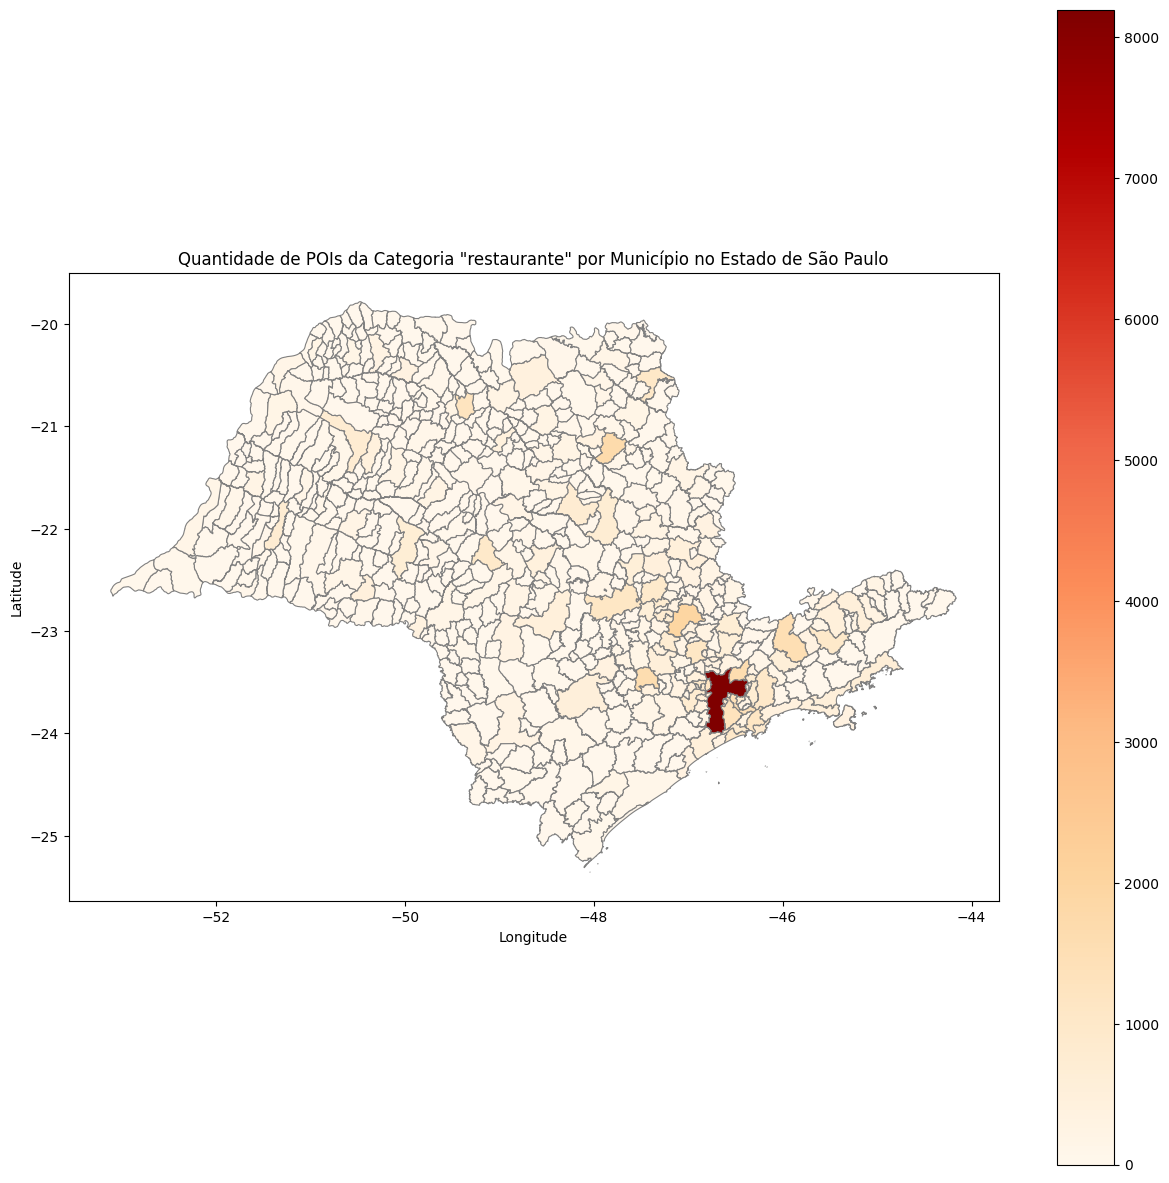

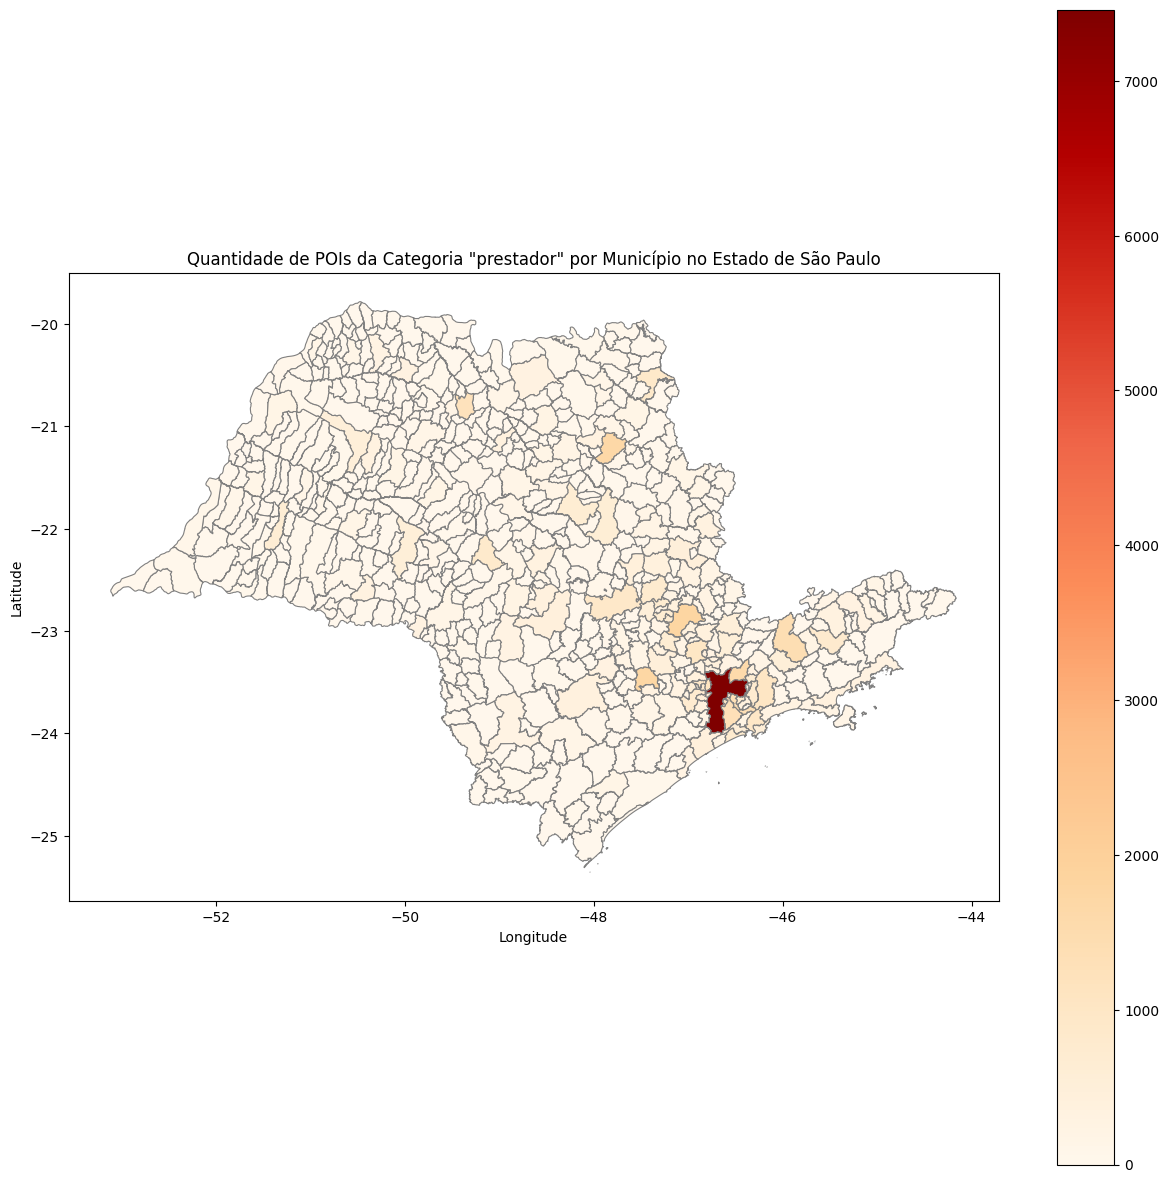

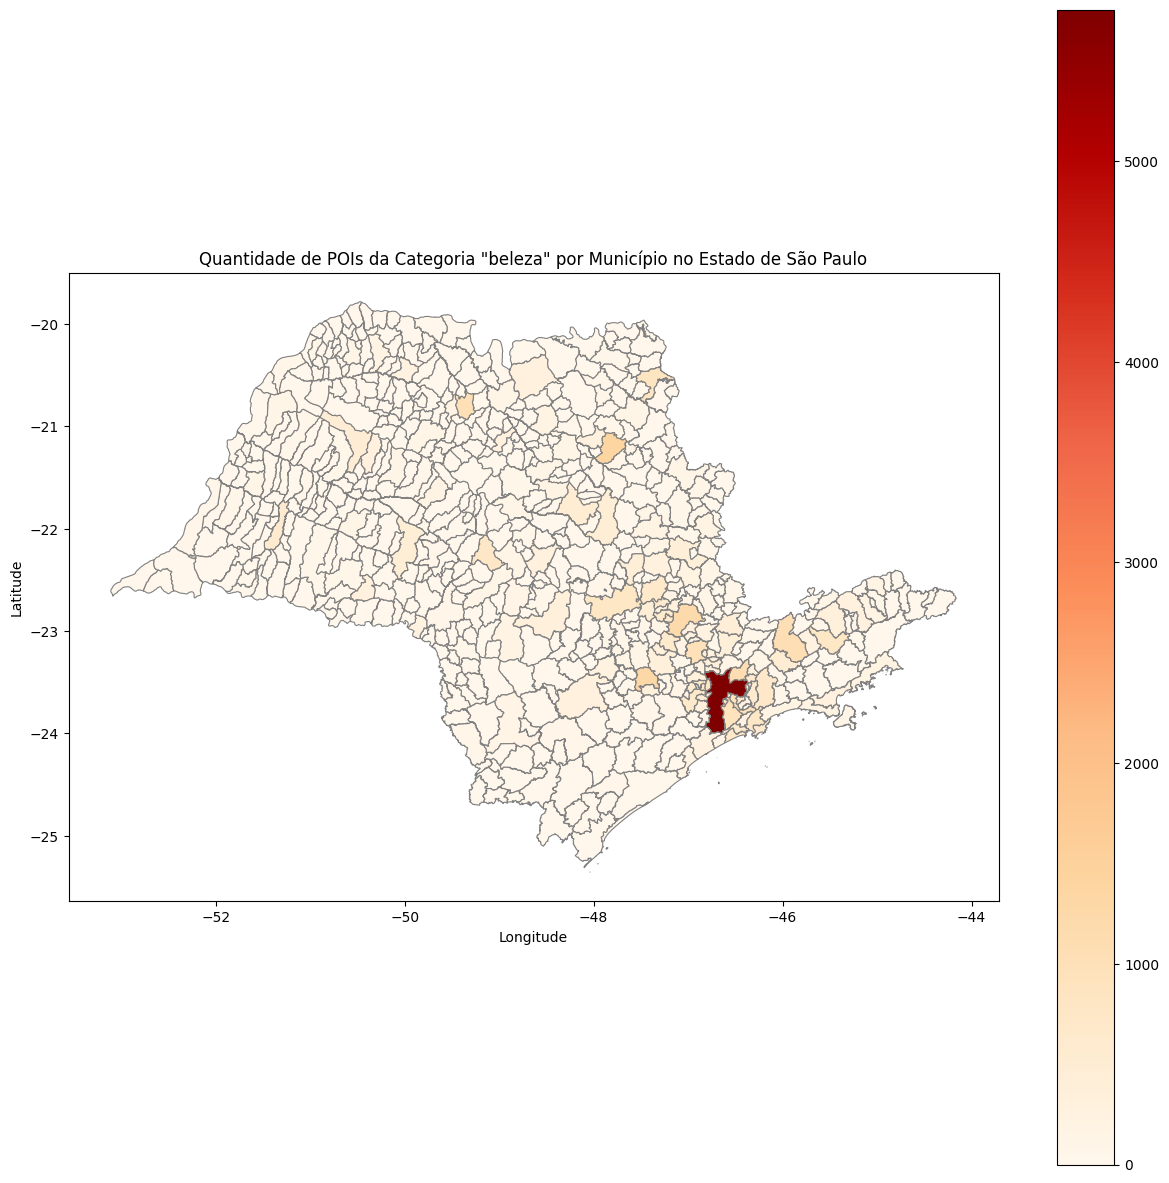

In [ ]:
pois_category_count = gdf_pontos_municipios.groupby(['NM_MUN', 'tipo_negocio']).size().reset_index(name='pois_category_count')

top_categories = pois_category_count.groupby('tipo_negocio')['pois_category_count'].sum().nlargest(5).index

filtered_pois_category_count = pois_category_count[pois_category_count['tipo_negocio'].isin(top_categories)]
for category in top_categories:

    category_data = filtered_pois_category_count[filtered_pois_category_count['tipo_negocio'] == category]

    municipio_counts = category_data.groupby('NM_MUN')['pois_category_count'].sum().reset_index()

    municipios_category = municipios.merge(municipio_counts, left_on='NM_MUN', right_on='NM_MUN', how='left')

    municipios_category['pois_category_count'] = municipios_category['pois_category_count'].fillna(0)

    fig, ax = plt.subplots(1, 1, figsize=(15, 15))
    municipios_category.plot(column='pois_category_count', cmap='OrRd', linewidth=0.8, ax=ax, edgecolor='0.5', legend=True)

    ax.set_title(f'Quantidade de POIs da Categoria "{category}" por Município no Estado de São Paulo', fontdict={'fontsize': '12', 'fontweight' : '3'})
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')

    plt.show()

questao 4)

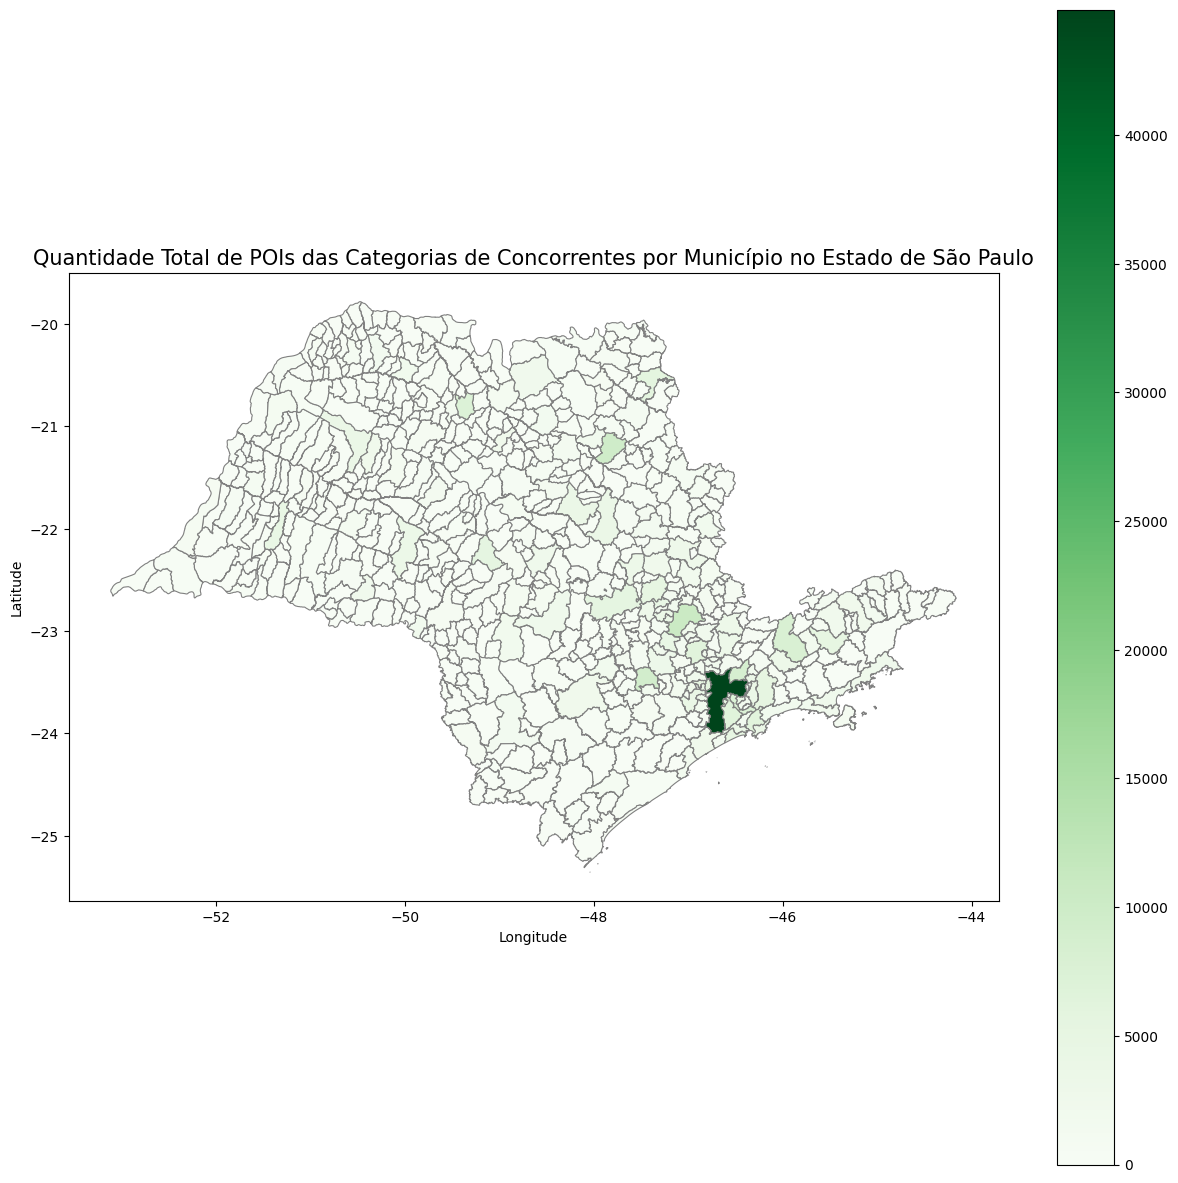

In [ ]:
concorrentes = ['restaurante', 'negocio', 'prestador', 'comercio', 'beleza']

concorrentes_data = gdf_pontos_municipios[gdf_pontos_municipios['tipo_negocio'].isin(concorrentes)]
concorrentes_count = concorrentes_data.groupby('NM_MUN').size().reset_index(name='po_concorrentes_count')
municipios_concorrentes = municipios.merge(concorrentes_count, left_on='NM_MUN', right_on='NM_MUN', how='left')

municipios_concorrentes['po_concorrentes_count'] = municipios_concorrentes['po_concorrentes_count'].fillna(0)

#Plotar o mapa
fig, ax = plt.subplots(1, 1, figsize=(15, 15))
municipios_concorrentes.plot(column='po_concorrentes_count', cmap='Greens', linewidth=0.8, ax=ax, edgecolor='0.5', legend=True)
ax.set_title('Quantidade Total de POIs das Categorias de Concorrentes por Município no Estado de São Paulo', fontdict={'fontsize': '15', 'fontweight' : '3'})
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

plt.show()


In [ ]:
pip install libpysal esda


 Questao 5)

In [ ]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point
from libpysal.weights import Queen
from esda.moran import Moran

# --- Análise Total de POIs por Município ---
municipios_total = municipios.merge(pois_count, left_on='NM_MUN', right_on='NM_MUN', how='left')
municipios_total['pois_count'] = municipios_total['pois_count'].fillna(0)

w_total = Queen.from_dataframe(municipios_total)

values_total = municipios_total['pois_count'].values
moran_total = Moran(values_total, w_total)
print(f'Coeficiente I de Moran Global (Total de POIs): {moran_total.I}')
print(f'P-valor: {moran_total.p_sim}')

# --- Análise de Top 5 Categorias de POIs ---
top_category_count = top_category_data.groupby('NM_MUN').size().reset_index(name='top_category_count')

municipios_top = municipios.merge(top_category_count, left_on='NM_MUN', right_on='NM_MUN', how='left')
municipios_top['top_category_count'] = municipios_top['top_category_count'].fillna(0)

w_top = Queen.from_dataframe(municipios_top)

values_top = municipios_top['top_category_count'].values
moran_top = Moran(values_top, w_top)
print(f'Coeficiente I de Moran Global (Top 5 Categorias): {moran_top.I}')
print(f'P-valor: {moran_top.p_sim}')

# --- Análise de POIs para Categorias de Concorrentes ---

w_concorrentes = Queen.from_dataframe(municipios_concorrentes)

values_concorrentes = municipios_concorrentes['po_concorrentes_count'].values
moran_concorrentes = Moran(values_concorrentes, w_concorrentes)
print(f'Coeficiente I de Moran Global (Concorrentes): {moran_concorrentes.I}')
print(f'P-valor: {moran_concorrentes.p_sim}')



<ipython-input-209-6cd36a7c69ab>:17: FutureWarning: `use_index` defaults to False but will default to True in future. Set True/False directly to control this behavior and silence this warning
  w_total = Queen.from_dataframe(municipios_total)
/usr/local/lib/python3.10/dist-packages/libpysal/weights/contiguity.py:347: UserWarning: The weights matrix is not fully connected: 
 There are 2 disconnected components.
 There is 1 island with id: 232.
  W.__init__(self, neighbors, ids=ids, **kw)


('WARNING: ', 232, ' is an island (no neighbors)')
Coeficiente I de Moran Global (Total de POIs): 0.3231484048024094
P-valor: 0.001


<ipython-input-209-6cd36a7c69ab>:37: FutureWarning: `use_index` defaults to False but will default to True in future. Set True/False directly to control this behavior and silence this warning
  w_top = Queen.from_dataframe(municipios_top)
/usr/local/lib/python3.10/dist-packages/libpysal/weights/contiguity.py:347: UserWarning: The weights matrix is not fully connected: 
 There are 2 disconnected components.
 There is 1 island with id: 232.
  W.__init__(self, neighbors, ids=ids, **kw)


('WARNING: ', 232, ' is an island (no neighbors)')
Coeficiente I de Moran Global (Top 5 Categorias): 0.326003200536287
P-valor: 0.001


<ipython-input-209-6cd36a7c69ab>:50: FutureWarning: `use_index` defaults to False but will default to True in future. Set True/False directly to control this behavior and silence this warning
  w_concorrentes = Queen.from_dataframe(municipios_concorrentes)


('WARNING: ', 232, ' is an island (no neighbors)')
Coeficiente I de Moran Global (Concorrentes): 0.326003200536287
P-valor: 0.001


In [ ]:
pip install folium


Questao 6)

In [ ]:
import folium
from folium import IFrame

unidades_faturamento = pd.read_parquet('/content/unidades_faturamento.parquet')

faturamento_colunas = unidades_faturamento.columns[1:-2]
unidades_faturamento[faturamento_colunas] = unidades_faturamento[faturamento_colunas].apply(pd.to_numeric, errors='coerce')
unidades_faturamento['mediana_faturamento'] = unidades_faturamento[faturamento_colunas].median(axis=1)

m = folium.Map(location=[-23.5505, -46.6333], zoom_start=12)

for _, row in unidades_faturamento.iterrows():
    lat = row['latitude']
    lon = row['longitude']
    faturamento = row['mediana_faturamento']
    id_unidade = row['id_unidade']

    popup_text = f"""
    <b>ID da Unidade:</b> {id_unidade}<br>
    <b>Latitude:</b> {lat}<br>
    <b>Longitude:</b> {lon}<br>
    <b>Mediana do Faturamento:</b> R${faturamento:,.2f}
    """

    iframe = IFrame(popup_text, width=200, height=150)
    popup = folium.Popup(iframe, max_width=200)

    folium.Marker(
        location=[lat, lon],
        popup=popup,
        icon=folium.Icon(color='blue', icon='info-sign')
    ).add_to(m)

m.save('/content/Mapa_Faturamento.html')


Questao 7) copiei a questao 6 so adicionei a Regressao Linear e as tendencias

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import folium
from folium import IFrame

unidades_faturamento = pd.read_parquet('/content/unidades_faturamento.parquet')

faturamento_colunas = unidades_faturamento.columns[1:-2]
unidades_faturamento[faturamento_colunas] = unidades_faturamento[faturamento_colunas].apply(pd.to_numeric, errors='coerce')
unidades_faturamento['mediana_faturamento'] = unidades_faturamento[faturamento_colunas].median(axis=1)

unidades_faturamento['tendencia'] = np.nan

for idx, row in unidades_faturamento.iterrows():

    y = row[faturamento_colunas].values.reshape(-1, 1)

    X = np.arange(len(faturamento_colunas)).reshape(-1, 1)


    reg = LinearRegression().fit(X, y)

    slope = reg.coef_[0][0]
    if slope > 0:
        tendencia = 'alta'
    else:
        tendencia = 'baixa'

    unidades_faturamento.at[idx, 'tendencia'] = tendencia

m = folium.Map(location=[-23.5505, -46.6333], zoom_start=12)

for _, row in unidades_faturamento.iterrows():
    lat = row['latitude']
    lon = row['longitude']
    faturamento = row['mediana_faturamento']
    id_unidade = row['id_unidade']
    tendencia = row['tendencia']

    color = 'green' if tendencia == 'alta' else 'red'

    popup_text = f"""
    <b>ID da Unidade:</b> {id_unidade}<br>
    <b>Latitude:</b> {lat}<br>
    <b>Longitude:</b> {lon}<br>
    <b>Mediana do Faturamento:</b> R${faturamento:,.2f}<br>
    <b>Tendência:</b> {tendencia.capitalize()}
    """

    iframe = IFrame(popup_text, width=200, height=150)
    popup = folium.Popup(iframe, max_width=200)

    folium.Marker(
        location=[lat, lon],
        popup=popup,
        icon=folium.Icon(color=color, icon='info-sign')
    ).add_to(m)

m.save('/content/Mapa_Faturamento_Tendencia.html')



<ipython-input-212-4c6d2a69b7d0>:36: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'alta' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  unidades_faturamento.at[idx, 'tendencia'] = tendencia


8)

/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py:3473: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):


    CD_MUN            NM_MUN SIGLA  AREA_KM2  \
0  3500105        Adamantina    SP   411.987   
1  3500204            Adolfo    SP   211.055   
2  3500303             Aguaí    SP   474.554   
3  3500402    Águas da Prata    SP   142.673   
4  3500501  Águas de Lindóia    SP    60.126   

                                            geometry  faturamento_medio  
0  POLYGON ((-51.05425 -21.40465, -51.05300 -21.4...       8.904884e+06  
1  POLYGON ((-49.65795 -21.20333, -49.65645 -21.2...                NaN  
2  POLYGON ((-46.97640 -21.96818, -46.97599 -21.9...       1.157547e+07  
3  POLYGON ((-46.73501 -21.81891, -46.73431 -21.8...       1.080635e+07  
4  POLYGON ((-46.60614 -22.44173, -46.60347 -22.4...       9.887051e+04  
Index(['CD_MUN', 'NM_MUN', 'SIGLA', 'AREA_KM2', 'geometry',
       'faturamento_medio'],
      dtype='object')


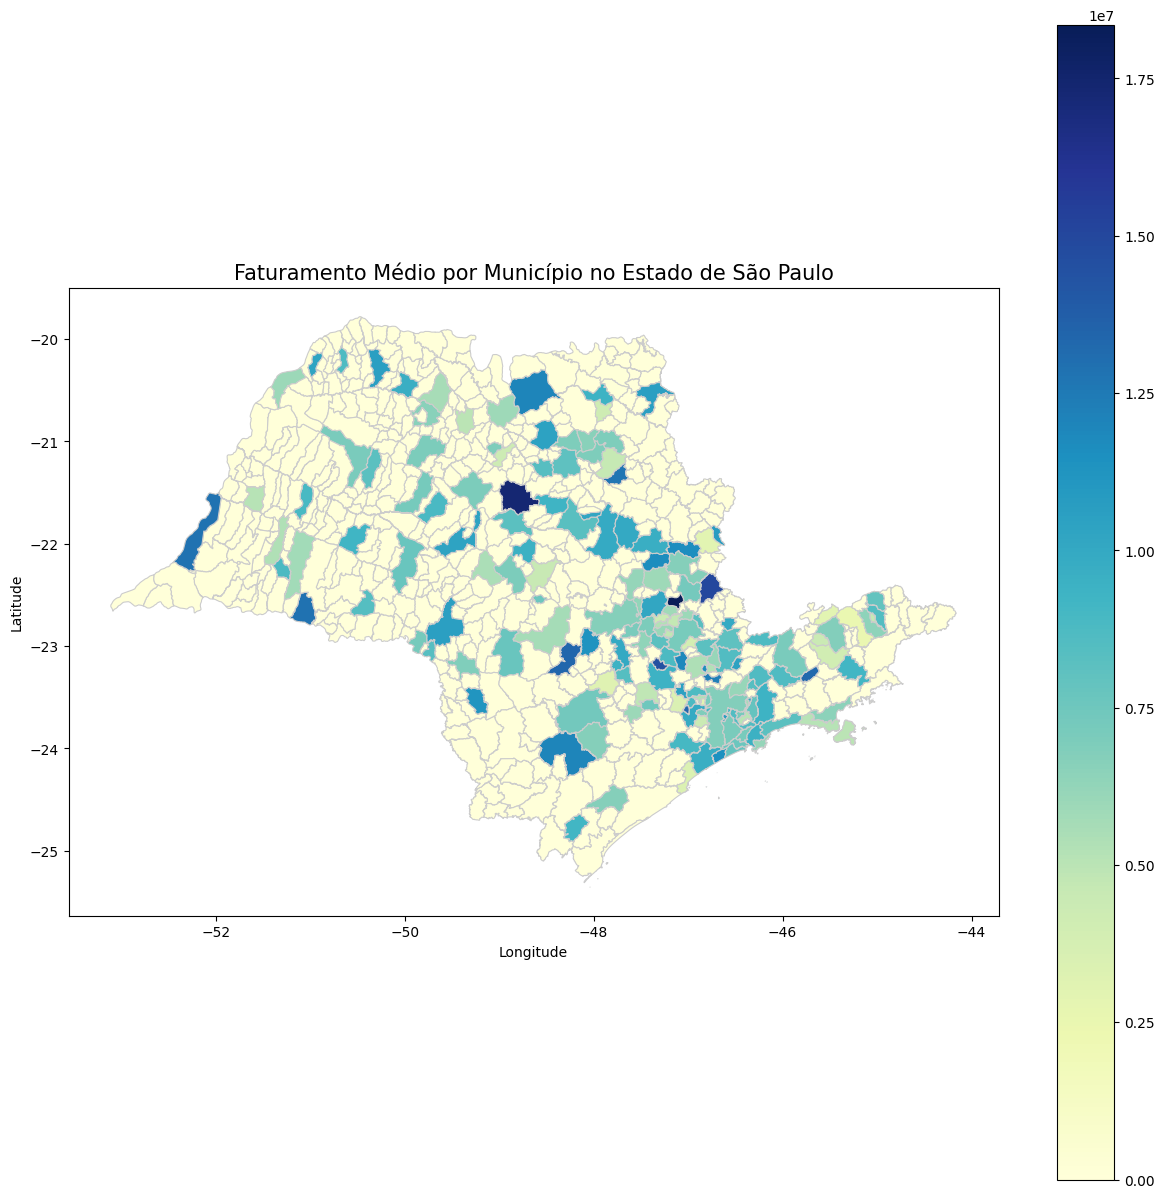

In [ ]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point

unidades_faturamento = pd.read_parquet('/content/unidades_faturamento.parquet')
municipios = gpd.read_file('/content/SP_Municipios')

faturamento_colunas = unidades_faturamento.columns[1:-2]
unidades_faturamento[faturamento_colunas] = unidades_faturamento[faturamento_colunas].apply(pd.to_numeric, errors='coerce')
unidades_faturamento['mediana_faturamento'] = unidades_faturamento[faturamento_colunas].median(axis=1)

geometry = [Point(xy) for xy in zip(unidades_faturamento.longitude, unidades_faturamento.latitude)]
gdf_unidades_faturamento = gpd.GeoDataFrame(unidades_faturamento, geometry=geometry)
gdf_unidades_faturamento = gdf_unidades_faturamento.set_crs(municipios.crs)

gdf_faturamento_municipios = gpd.sjoin(gdf_unidades_faturamento, municipios, how="left", op='within')

faturamento_medio_municipio = gdf_faturamento_municipios.groupby('NM_MUN')['mediana_faturamento'].mean().reset_index()
faturamento_medio_municipio.rename(columns={'mediana_faturamento': 'faturamento_medio'}, inplace=True)

municipios = municipios.merge(faturamento_medio_municipio, left_on='NM_MUN', right_on='NM_MUN', how='left')

print(municipios.head())
print(municipios.columns)

municipios['faturamento_medio'] = municipios['faturamento_medio'].fillna(0)

#Plotar o mapa
fig, ax = plt.subplots(1, 1, figsize=(15, 15))
municipios.plot(column='faturamento_medio', cmap='YlGnBu', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
ax.set_title('Faturamento Médio por Município no Estado de São Paulo', fontdict={'fontsize': '15', 'fontweight': '3'})
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

plt.show()

9)Baixei dados populacional de 2021 do site do IBGE, abri e filtrei so os municipios de sao paulo !!! Obs( Por mais simples que parecia esse exercicio eu fiquei cerca de 7 horas nele kkkkkk )

In [ ]:
import pandas as pd
dados_populacao_sp = pd.read_csv('/content/pessoas.csvUTF8.csv', sep=';')
dados_populacao_sp.head()

,estado,codigo,numero,municipio,populacao
0,SP,35,105,Adamantina,35.153
1,SP,35,204,Adolfo,3.545
2,SP,35,303,Aguaí,36.981
3,SP,35,402,Águas da Prata,8.262
4,SP,35,501,Águas de Lindóia,18.908


In [ ]:
import pandas as pd

municipios.to_csv('municipios.csv', index=False)



In [ ]:
import pandas as pd

pessoas = pd.read_csv('/content/pessoas.csvUTF8.csv', sep=';')
municipios = pd.read_csv('municipios.csv')


municipios.head()

,CD_MUN,NM_MUN,SIGLA,AREA_KM2,geometry,faturamento_medio
0,3500105,Adamantina,SP,411.987,"POLYGON ((-51.05425046600003 -21.404651208, -5...",8.904884e+06
1,3500204,Adolfo,SP,211.055,POLYGON ((-49.65795085900002 -21.2033258819999...,0.000000e+00
2,3500303,Aguaí,SP,474.554,POLYGON ((-46.976402094999976 -21.968183992999...,1.157547e+07
3,3500402,Águas da Prata,SP,142.673,POLYGON ((-46.73500884699992 -21.8189060119999...,1.080635e+07
4,3500501,Águas de Lindóia,SP,60.126,POLYGON ((-46.60614041099997 -22.4417297429999...,9.887051e+04


In [ ]:
pessoas.head()

,estado,codigo,numero,municipio,populacao
0,SP,35,105,Adamantina,35.153
1,SP,35,204,Adolfo,3.545
2,SP,35,303,Aguaí,36.981
3,SP,35,402,Águas da Prata,8.262
4,SP,35,501,Águas de Lindóia,18.908


In [ ]:
municipios = pd.read_csv('/content/municipios.csv')
pessoas = pd.read_csv('/content/pessoas.csvUTF8.csv', delimiter=';')


In [ ]:
print(municipios.columns)
print(pessoas.columns)


Index(['CD_MUN', 'NM_MUN', 'SIGLA', 'AREA_KM2', 'geometry',
       'faturamento_medio'],
      dtype='object')
Index(['estado', 'codigo', 'numero', 'municipio', 'populacao'], dtype='object')


In [ ]:

df_merged['populacao'] = pd.to_numeric(df_merged['populacao'], errors='coerce')


df_merged['faturamento_por_100k_hab'] = (df_merged['faturamento_medio'] / df_merged['populacao']) * 100000

In [ ]:
df_merged['faturamento_por_100k_hab'] = (df_merged['faturamento_medio'] / df_merged['populacao']) * 100000


In [ ]:
print(df_merged[['NM_MUN', 'SIGLA', 'faturamento_por_100k_hab']])


               NM_MUN SIGLA  faturamento_por_100k_hab
0          Adamantina    SP              2.533179e+10
1              Adolfo    SP              0.000000e+00
2               Aguaí    SP              3.130113e+10
3      Águas da Prata    SP              1.307958e+11
4    Águas de Lindóia    SP              5.229030e+08
..                ...   ...                       ...
640        Votorantim    SP              6.014198e+09
641       Votuporanga    SP              1.007197e+10
642          Zacarias    SP              0.000000e+00
643         Chavantes    SP              6.700469e+10
644      Estiva Gerbi    SP              0.000000e+00

[645 rows x 3 columns]


In [ ]:
print(df_merged[['NM_MUN', 'SIGLA', 'faturamento_medio', 'populacao', 'faturamento_por_100k_hab']].head())

             NM_MUN SIGLA  faturamento_medio  populacao  \
0        Adamantina    SP       8.904884e+06     35.153   
1            Adolfo    SP       0.000000e+00      3.545   
2             Aguaí    SP       1.157547e+07     36.981   
3    Águas da Prata    SP       1.080635e+07      8.262   
4  Águas de Lindóia    SP       9.887051e+04     18.908   

   faturamento_por_100k_hab  
0              2.533179e+10  
1              0.000000e+00  
2              3.130113e+10  
3              1.307958e+11  
4              5.229030e+08  


In [ ]:
df_merged.tail()

,CD_MUN,NM_MUN,SIGLA,AREA_KM2,geometry,faturamento_medio,estado,codigo,numero,municipio,populacao,faturamento_por_100k_hab
640,3557006,Votorantim,SP,184.186,POLYGON ((-47.37439737699997 -23.5204155589999...,7.485752e+06,SP,35,57006,Votorantim,124.468,6.014198e+09
641,3557105,Votuporanga,SP,420.703,POLYGON ((-50.021205610999985 -20.333935065999...,9.679767e+06,SP,35,57105,Votuporanga,96.106,1.007197e+10
642,3557154,Zacarias,SP,319.056,POLYGON ((-49.99274663599992 -21.0388351069999...,0.000000e+00,SP,35,57154,Zacarias,2.784,0.000000e+00
643,3557204,Chavantes,SP,188.727,POLYGON ((-49.68630378999991 -22.9378735439999...,8.320643e+06,SP,35,57204,Chavantes,12.418,6.700469e+10
644,3557303,Estiva Gerbi,SP,74.144,POLYGON ((-46.93970256499995 -22.1851977169999...,0.000000e+00,SP,35,57303,Estiva Gerbi,11.507,0.000000e+00


10)

11)